随机生成一个w、b，以及对应的数据集，然后使用线性回归、梯度下降来求解出w、b

教程：[龙良曲PyTorch](https://www.bilibili.com/video/BV1fT4y1d7av?p=5&vd_source=4b31946931a7c038ee64bc9619104ec0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[0.51587967]
 [0.26455664]
 [0.48578419]
 [0.34215316]
 [0.30995373]]
[[25.11755858]
 [19.02200101]
 [24.01135211]
 [21.56379641]
 [20.54356335]]


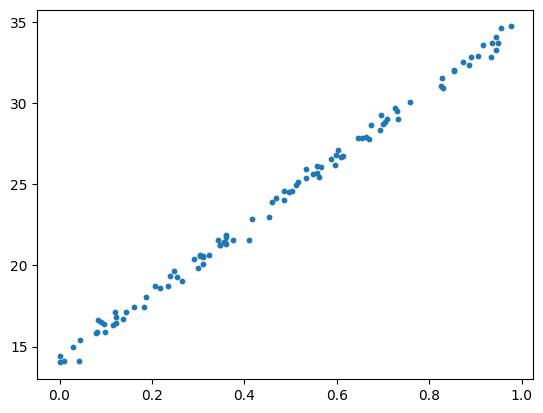

In [2]:
# get linear data with random noise

# w: weight, b: bias, num_data: number of data, noise: noise weight
def get_linear_data(w, b, num_data, noise):
    x = np.random.rand(num_data, 1) # 0~1 random number with shape (num_data, 1)
    y = w * x + b + noise * np.random.randn(num_data, 1)
    return x, y

w = 21
b = 14
num_data = 100
noise = 0.3
x_train, y_train = get_linear_data(w, b, num_data, noise)

# show data
print(x_train[:5])
print(y_train[:5])
plt.scatter(x_train, y_train, s=10)

In [3]:
# 线性回归的损失函数
def loss(y, y_hat):
    return np.mean(np.square(y - y_hat))

In [4]:
# 线性回归的梯度函数
# 对w、b求偏导，得到梯度
def gradient(x, y, y_hat):
    dw = np.mean((y_hat - y) * x)
    db = np.mean(y_hat - y)
    return dw, db

In [5]:
# 线性回归的训练函数
def train(x, y, learning_rate, epochs):
    w = np.random.randn(1)
    b = np.random.randn(1)
    for i in range(epochs):
        y_hat = w * x + b # 求y的预测值
        loss_value = loss(y, y_hat) # 求损失
        dw, db = gradient(x, y, y_hat) # 求梯度

        # 梯度下降法更新参数
        w -= learning_rate * dw
        b -= learning_rate * db

        # 打印训练过程
        if i % 100 == 0:
            print("Epochs %d, loss %f" % (i, loss_value))
            print("w: %f, b: %f" % (w, b))
    return w, b

In [6]:
w_pridict, b_pridict = train(x_train, y_train, 0.1, 1000)
print("w_pridict: %f, b_pridict: %f" % (w_pridict, b_pridict))

Epochs 0, loss 606.554612
w: 2.076598, b: 1.979381
Epochs 100, loss 2.443813
w: 15.514963, b: 16.810767
Epochs 200, loss 0.763317
w: 18.051486, b: 15.538446
Epochs 300, loss 0.292623
w: 19.393902, b: 14.865069
Epochs 400, loss 0.160785
w: 20.104358, b: 14.508693
Epochs 500, loss 0.123858
w: 20.480359, b: 14.320085
Epochs 600, loss 0.113515
w: 20.679352, b: 14.220266
Epochs 700, loss 0.110618
w: 20.784667, b: 14.167439
Epochs 800, loss 0.109807
w: 20.840404, b: 14.139480
Epochs 900, loss 0.109580
w: 20.869902, b: 14.124684
w_pridict: 20.885401, b_pridict: 14.116909
